<a href="https://colab.research.google.com/github/sherinjames-sj/GoogleColab_BigData/blob/main/Logisitc_Regression_Lab_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install pyspark in google colab
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 15.0 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=f14367a3b7afb4dbde405da343b6af160b5eac2762b958f7ff9aa491505b7513
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [ ]:
spark

In [ ]:
dataset = spark.read.format("csv").option("header","true").option("inferSchema", "true").load("/content/diabetes (2) (1).csv")

In [ ]:
dataset.show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [ ]:
dataset.columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [ ]:
print('Summary, Pregnancies, Glucose, BloodPressure')
dataset.describe().select("Summary","Pregnancies","Glucose","BloodPressure").show()

print('Summary, SkinThickness, Insulin')
dataset.describe().select("Summary","SkinThickness","Insulin").show()

print('Summary, BMI, DiabetesPedigreeFunction, Age')
dataset.describe().select("Summary","BMI","DiabetesPedigreeFunction","Age").show()

Summary, Pregnancies, Glucose, BloodPressure
+-------+------------------+-----------------+------------------+
|Summary|       Pregnancies|          Glucose|     BloodPressure|
+-------+------------------+-----------------+------------------+
|  count|               768|              768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|
|    min|                 0|                0|                 0|
|    max|                17|              199|               122|
+-------+------------------+-----------------+------------------+

Summary, SkinThickness, Insulin
+-------+------------------+------------------+
|Summary|     SkinThickness|           Insulin|
+-------+------------------+------------------+
|  count|               768|               768|
|   mean|20.536458333333332| 79.79947916666667|
| stddev|15.952217567727642|115.24400235133803|
|    min|                 0|            

In [ ]:
# replace min value of zeros with Nan as data cleaning processs

import numpy as np
from pyspark.sql.functions import when
dataset=dataset.withColumn("Glucose",when(dataset.Glucose==0,np.nan).otherwise (dataset.Glucose))
dataset=dataset.withColumn("BloodPressure",when(dataset.BloodPressure==0,np.nan).otherwise(dataset.BloodPressure))
dataset=dataset.withColumn("SkinThickness",when(dataset.SkinThickness==0,np.nan).otherwise(dataset.SkinThickness))
dataset=dataset.withColumn("BMI",when(dataset.BMI==0,np.nan).otherwise(dataset.BMI))
dataset=dataset.withColumn("Insulin",when(dataset.Insulin==0,np.nan).otherwise(dataset.Insulin))
dataset.select("Insulin","Glucose","BloodPressure","SkinThickness","BMI").show(5)

+-------+-------+-------------+-------------+----+
|Insulin|Glucose|BloodPressure|SkinThickness| BMI|
+-------+-------+-------------+-------------+----+
|    NaN|  148.0|         72.0|         35.0|33.6|
|    NaN|   85.0|         66.0|         29.0|26.6|
|    NaN|  183.0|         64.0|          NaN|23.3|
|   94.0|   89.0|         66.0|         23.0|28.1|
|  168.0|  137.0|         40.0|         35.0|43.1|
+-------+-------+-------------+-------------+----+
only showing top 5 rows



In [ ]:
#impute
from pyspark.ml.feature import Imputer
imputer=Imputer(inputCols=["Glucose","BloodPressure","SkinThickness","BMI","Insulin"],outputCols=["Glucose","BloodPressure","SkinThickness","BMI","Insulin"])
model=imputer.fit(dataset)
dataset=model.transform(dataset)
dataset.show()

+-----------+-------+-----------------+------------------+-----------------+-----------------+------------------------+---+-------+
|Pregnancies|Glucose|    BloodPressure|     SkinThickness|          Insulin|              BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-----------------+------------------+-----------------+-----------------+------------------------+---+-------+
|          6|  148.0|             72.0|              35.0|155.5482233502538|             33.6|                   0.627| 50|      1|
|          1|   85.0|             66.0|              29.0|155.5482233502538|             26.6|                   0.351| 31|      0|
|          8|  183.0|             64.0|29.153419593345657|155.5482233502538|             23.3|                   0.672| 32|      1|
|          1|   89.0|             66.0|              23.0|             94.0|             28.1|                   0.167| 21|      0|
|          0|  137.0|             40.0|              35.0|            168.0|

In [ ]:
#combine all the features in one single feature vector.
cols=dataset.columns
cols.remove("Outcome")

# Let us import the vector assembler
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=cols,outputCol="features")

# Now let us use the transform method to transform our dataset
dataset=assembler.transform(dataset)
dataset.select("features").show(truncate=False)

+-----------------------------------------------------------------------------------+
|features                                                                           |
+-----------------------------------------------------------------------------------+
|[6.0,148.0,72.0,35.0,155.5482233502538,33.6,0.627,50.0]                            |
|[1.0,85.0,66.0,29.0,155.5482233502538,26.6,0.351,31.0]                             |
|[8.0,183.0,64.0,29.153419593345657,155.5482233502538,23.3,0.672,32.0]              |
|[1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0]                                          |
|[0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0]                                        |
|[5.0,116.0,74.0,29.153419593345657,155.5482233502538,25.6,0.201,30.0]              |
|[3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0]                                          |
|[10.0,115.0,72.40518417462484,29.153419593345657,155.5482233502538,35.3,0.134,29.0]|
|[2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0]          

In [ ]:
#Standard Sclarizer (Normalization i.e., to bring everything in the same range)
from pyspark.ml.feature import StandardScaler
standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
dataset=standardscaler.fit(dataset).transform(dataset)
dataset.select("features","Scaled_features").show(5)

+--------------------+--------------------+
|            features|     Scaled_features|
+--------------------+--------------------+
|[6.0,148.0,72.0,3...|[1.78063837321943...|
|[1.0,85.0,66.0,29...|[0.29677306220323...|
|[8.0,183.0,64.0,2...|[2.37418449762590...|
|[1.0,89.0,66.0,23...|[0.29677306220323...|
|[0.0,137.0,40.0,3...|[0.0,4.5012560836...|
+--------------------+--------------------+
only showing top 5 rows



In [ ]:
#Train, test split
train, test = dataset.randomSplit([0.8, 0.2], seed=12345)

In [ ]:
#imbalance in the dataset
dataset_size=float(train.select("Outcome").count())
numPositives=train.select("Outcome").where('Outcome == 1').count()
per_ones=(float(numPositives)/float(dataset_size))*100
numNegatives=float(dataset_size-numPositives)
print('The number of ones are {}'.format(numPositives))
print('Percentage of ones are {}'.format(per_ones))

The number of ones are 221
Percentage of ones are 35.24720893141946


In [ ]:
BalancingRatio= numNegatives/dataset_size
print('BalancingRatio = {}'.format(BalancingRatio))

BalancingRatio = 0.6475279106858054


In [ ]:
# balance 
train=train.withColumn("classWeights", when(train.Outcome == 1,BalancingRatio).otherwise(1-BalancingRatio))
train.select("classWeights").show(5)

+------------------+
|      classWeights|
+------------------+
|0.3524720893141946|
|0.3524720893141946|
|0.3524720893141946|
|0.3524720893141946|
|0.3524720893141946|
+------------------+
only showing top 5 rows



In [ ]:
#Feature selection

#Feature selection using chisquareSelector
from pyspark.ml.feature import ChiSqSelector
css = ChiSqSelector(featuresCol='Scaled_features',outputCol='Aspect',labelCol='Outcome',fpr=0.05)
train=css.fit(train).transform(train)
test=css.fit(test).transform(test)
test.select("Aspect").show(5,truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------+
|Aspect                                                                                                                                  |
+----------------------------------------------------------------------------------------------------------------------------------------+
|[0.0,2.7598942410664704,6.778906518747398,3.526357045954172,1.4702231396384098,5.556241336417194,0.7032293726142661,1.955743806611537]  |
|[0.0,3.3184442660442084,5.290853868290652,1.93380870262003,1.8295247783934943,3.0544782215906037,0.7605742570763735,1.785679127775751]  |
|[0.0,3.3184442660442084,5.373523459982693,3.1850966866682846,1.8295247783934943,3.5781030595775647,0.7153019798694465,1.870711467193644]|
|[0.0,3.3513001498664283,6.2002193769031075,2.616329421191805,1.8295247783934943,4.720981710256498,1.726382837490816,1.785679127775751]  |
|[0.0,3.449867801333088,5.6

In [ ]:
#Building a classification model using Logistic Regression (LR)
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="Outcome", featuresCol="Aspect",weightCol="classWeights",maxIter=10)
model=lr.fit(train)
predict_train=model.transform(train)
predict_test=model.transform(test)
predict_test.select("Outcome","prediction").show(10)

+-------+----------+
|Outcome|prediction|
+-------+----------+
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      0|       0.0|
|      1|       1.0|
|      1|       1.0|
+-------+----------+
only showing top 10 rows



In [ ]:
#Evaluating the model
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator=BinaryClassificationEvaluator(rawPredictionCol="rawPrediction",labelCol="Outcome")
predict_test.select("Outcome","rawPrediction","prediction","probability").show(5)

+-------+--------------------+----------+--------------------+
|Outcome|       rawPrediction|prediction|         probability|
+-------+--------------------+----------+--------------------+
|      0|[1.92703060509029...|       0.0|[0.87292038835456...|
|      0|[2.86679587735939...|       0.0|[0.94618041741076...|
|      0|[2.56925761588805...|       0.0|[0.92885665332668...|
|      0|[1.51041800877943...|       0.0|[0.81912314746457...|
|      0|[2.86307413613929...|       0.0|[0.94599058003314...|
+-------+--------------------+----------+--------------------+
only showing top 5 rows



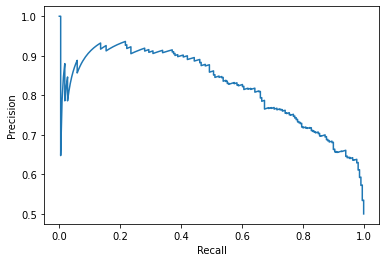

In [ ]:
print(model.summary)
import matplotlib.pyplot as plt
pr = model.summary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()